In [ ]:
!pip install imblearn

In [2]:
#importing necessary lubraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [3]:
#loading data
df=pd.read_csv('/content/drive/MyDrive/Colab Notbok files/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df[df.columns[:18]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married


In [5]:
df[df.columns[18:]]

,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
#check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#check null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values present

In [ ]:
#check duplicate data
df.duplicated().unique()

array([False])

No Duplicate data

In [ ]:
#class/value count of features
for i in df.columns:
  print('-'*50,'\n')
  print(df[i].value_counts())

-------------------------------------------------- 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-------------------------------------------------- 

No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------------------- 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------------------- 

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
-------------------------------------------------- 

Rese

In [ ]:
#statistic distribution of data
df[df.columns[:20]].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000


In [ ]:
#statistic distribution of data
df[df.columns[20:35]].describe()

,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


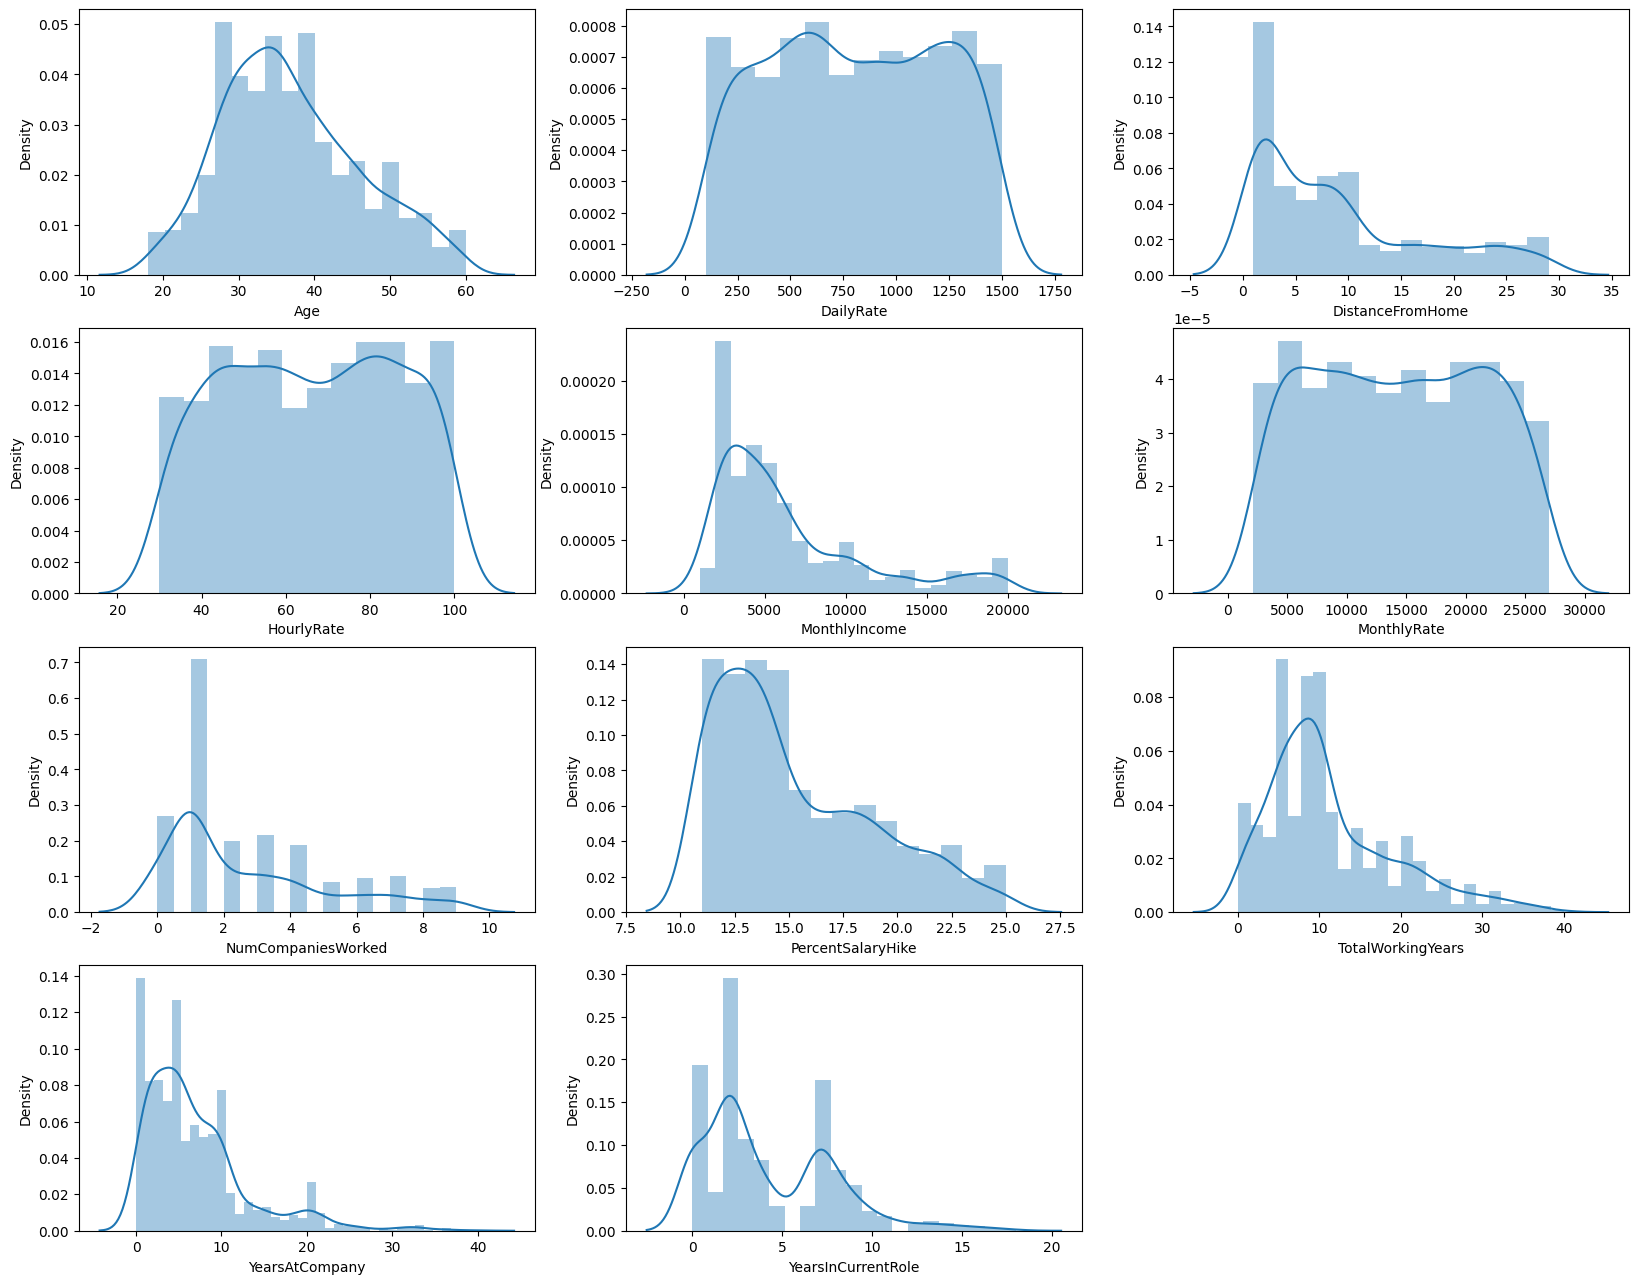

In [ ]:
#ploting distribution
cont_f=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole']
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(5,3,plotno)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

Monthely Income, DistanceFromHome, Percentsalaryhike, Totalworkingyears, yearsatcompany and yearsincurrentrole are skewed towards right

<Axes: xlabel='Attrition', ylabel='count'>

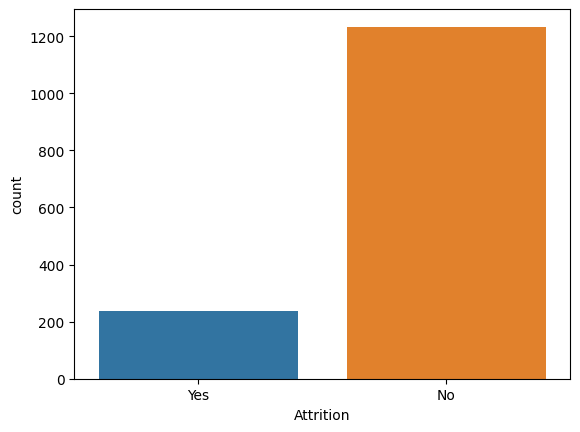

In [ ]:
#check class distribution of attrition
sns.countplot(data=df,x=df['Attrition'])

class distribution is imbalanced

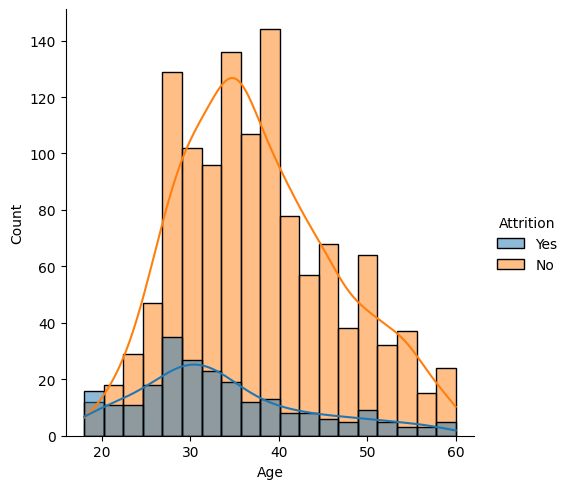

In [ ]:
#check age wise attrition
sns.displot(data=df,x=df['Age'],hue=df['Attrition'],kde=True)

<Axes: xlabel='BusinessTravel', ylabel='count'>

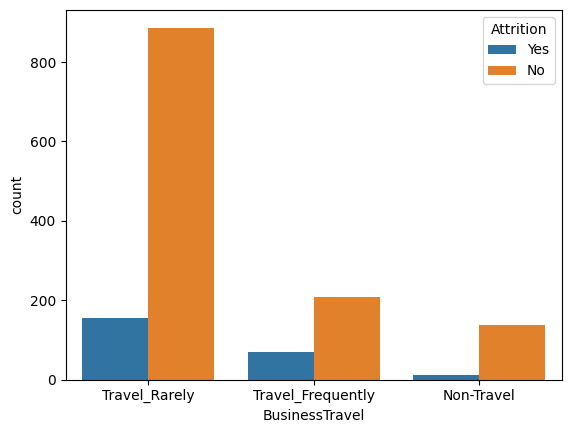

In [ ]:
#ratio of buisness travel and attrition rate
sns.countplot(data=df,x=df['BusinessTravel'],hue=df['Attrition'])

the employee who need to travel they more likely to  leave company as compare to employee who dont need to travel

<Axes: xlabel='Department', ylabel='count'>

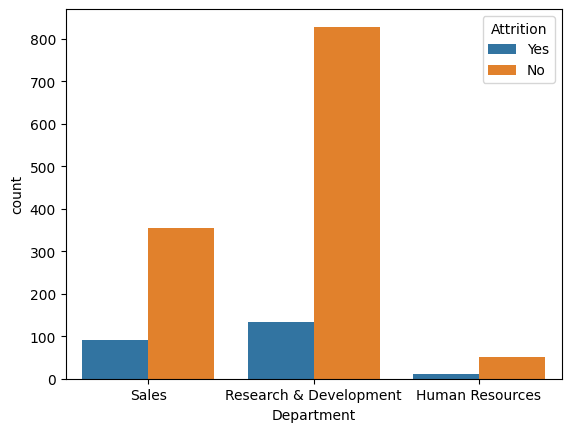

In [ ]:
#ratio of Department and attrition rate
sns.countplot(data=df,x=df['Department'],hue=df['Attrition'])

As more people are in sales and reasearch & Development Department so attrition rate for those department is high as compare to HR departnent

<Axes: xlabel='EducationField', ylabel='count'>

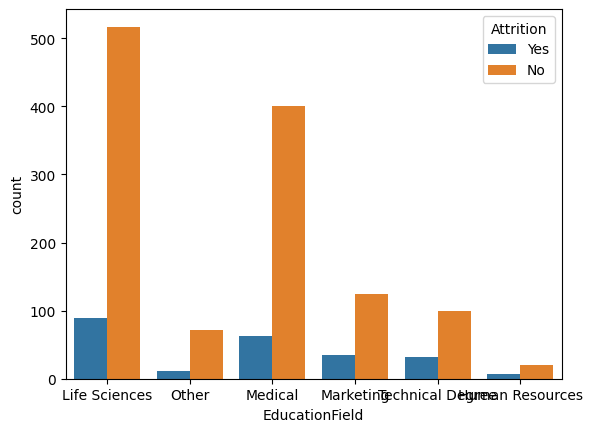

In [ ]:
#ratio of EducationField and attrition rate
sns.countplot(data=df,x=df['EducationField'],hue=df['Attrition'])

usually the more data in specific class the more attrition rate it has, no specific or highly relation

<Axes: xlabel='JobInvolvement', ylabel='count'>

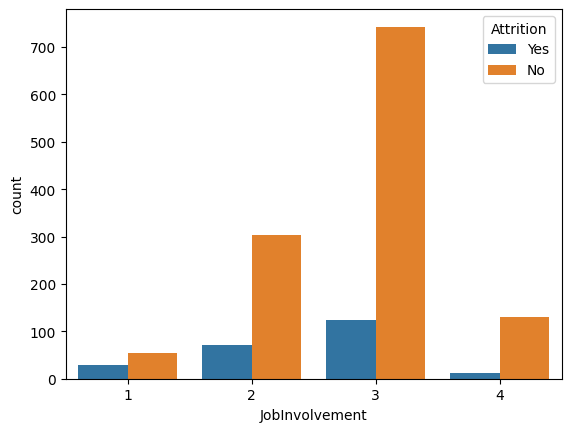

In [ ]:
#ratio of JobInvolvement and attrition rate
sns.countplot(data=df,x=df['JobInvolvement'],hue=df['Attrition'])

usually the more data in specific class the more attrition rate it has, no specific or highly relation

<Axes: xlabel='JobLevel', ylabel='count'>

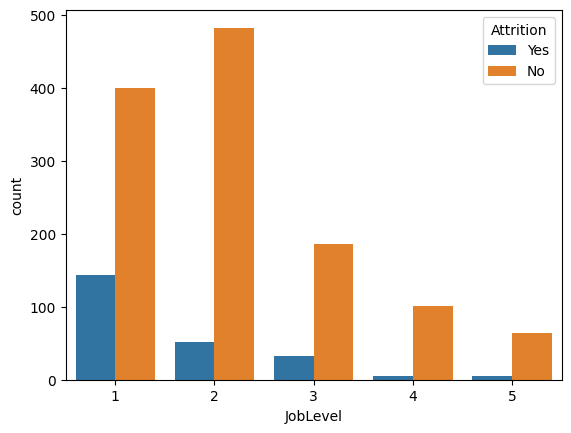

In [ ]:
#ratio of JobLevel and attrition rate
sns.countplot(data=df,x=df['JobLevel'],hue=df['Attrition'])

job level 1 has more attrition rate

<Axes: xlabel='MaritalStatus', ylabel='count'>

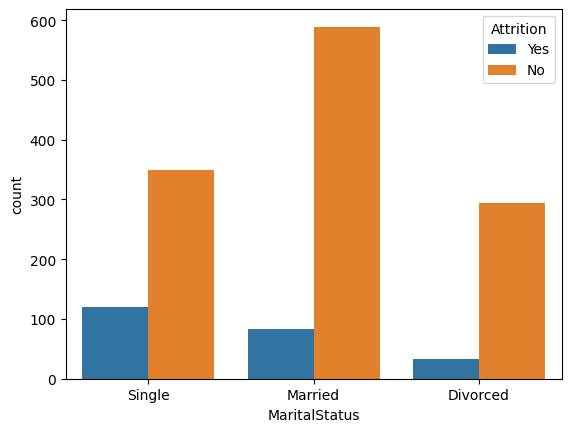

In [ ]:
#ratio of MaritalStatus and attrition rate
sns.countplot(data=df,x=df['MaritalStatus'],hue=df['Attrition'])

The employee with single status are more likely to switch, then respectively married and divorced

<Axes: xlabel='OverTime', ylabel='count'>

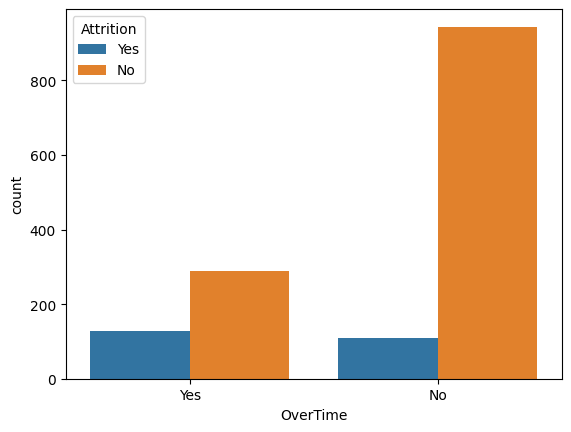

In [ ]:
#ratio of OverTime and attrition rate
sns.countplot(data=df,x=df['OverTime'],hue=df['Attrition'])

the half of the employee who do part time are leaving the company

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

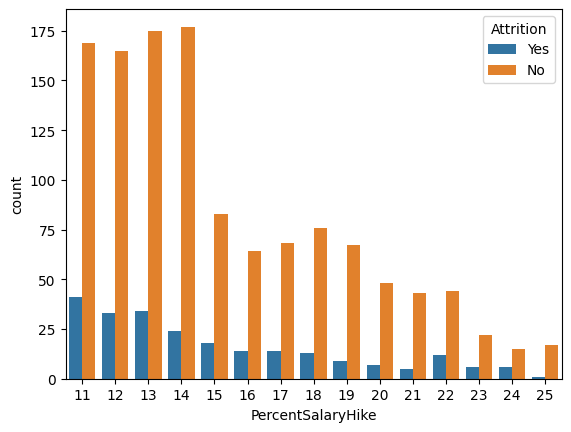

In [ ]:
#ratio of PercentSalaryHike and attrition rate
sns.countplot(data=df,x=df['PercentSalaryHike'],hue=df['Attrition'])

As percentsalary hike increases attrition rate decreases, also there are more employee with less salary hike so attrintion rate in among those employee's are high as compare to the empoloyee with high salarypercenthike

<Axes: xlabel='RelationshipSatisfaction', ylabel='count'>

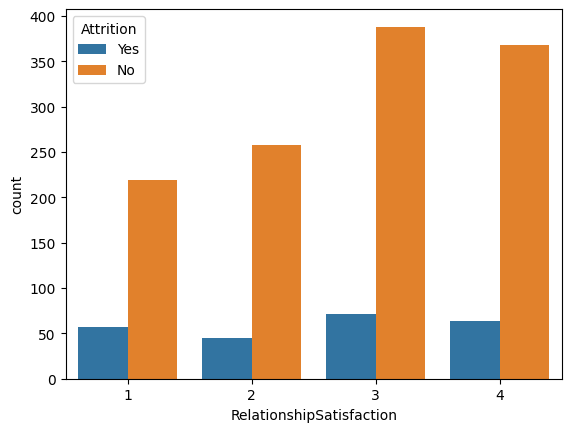

In [ ]:
#ratio of RelationshipSatisfaction and attrition rate
sns.countplot(data=df,x=df['RelationshipSatisfaction'],hue=df['Attrition'])

employee who have Relationsatisfactin 1 they are more likely to leave the organization

<Axes: xlabel='StockOptionLevel', ylabel='count'>

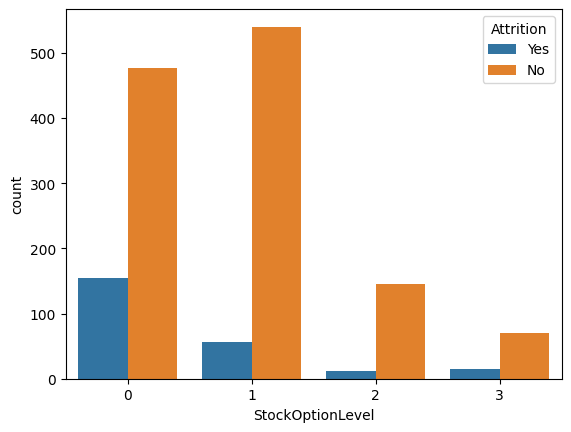

In [ ]:
#ratio of StockOptionLevel and attrition rate
sns.countplot(data=df,x=df['StockOptionLevel'],hue=df['Attrition'])

less attrition rate in stockoptionlevel 1 and 2

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

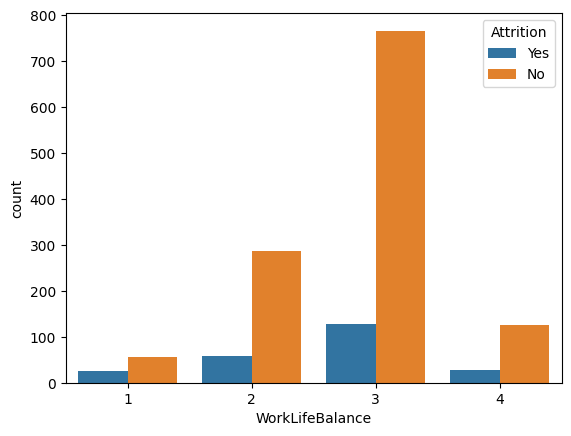

In [ ]:
#ratio of WorkLifeBalance and attrition rate
sns.countplot(data=df,x=df['WorkLifeBalance'],hue=df['Attrition'])

Half of the people are leaving copmany who have worklifebalance 1

In [6]:
#feaature encoding
encode=LabelEncoder()
str_f=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in str_f:
  df[i]=encode.fit_transform(df[i])


In [7]:
#delete unwanted columns
df.drop(columns=['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

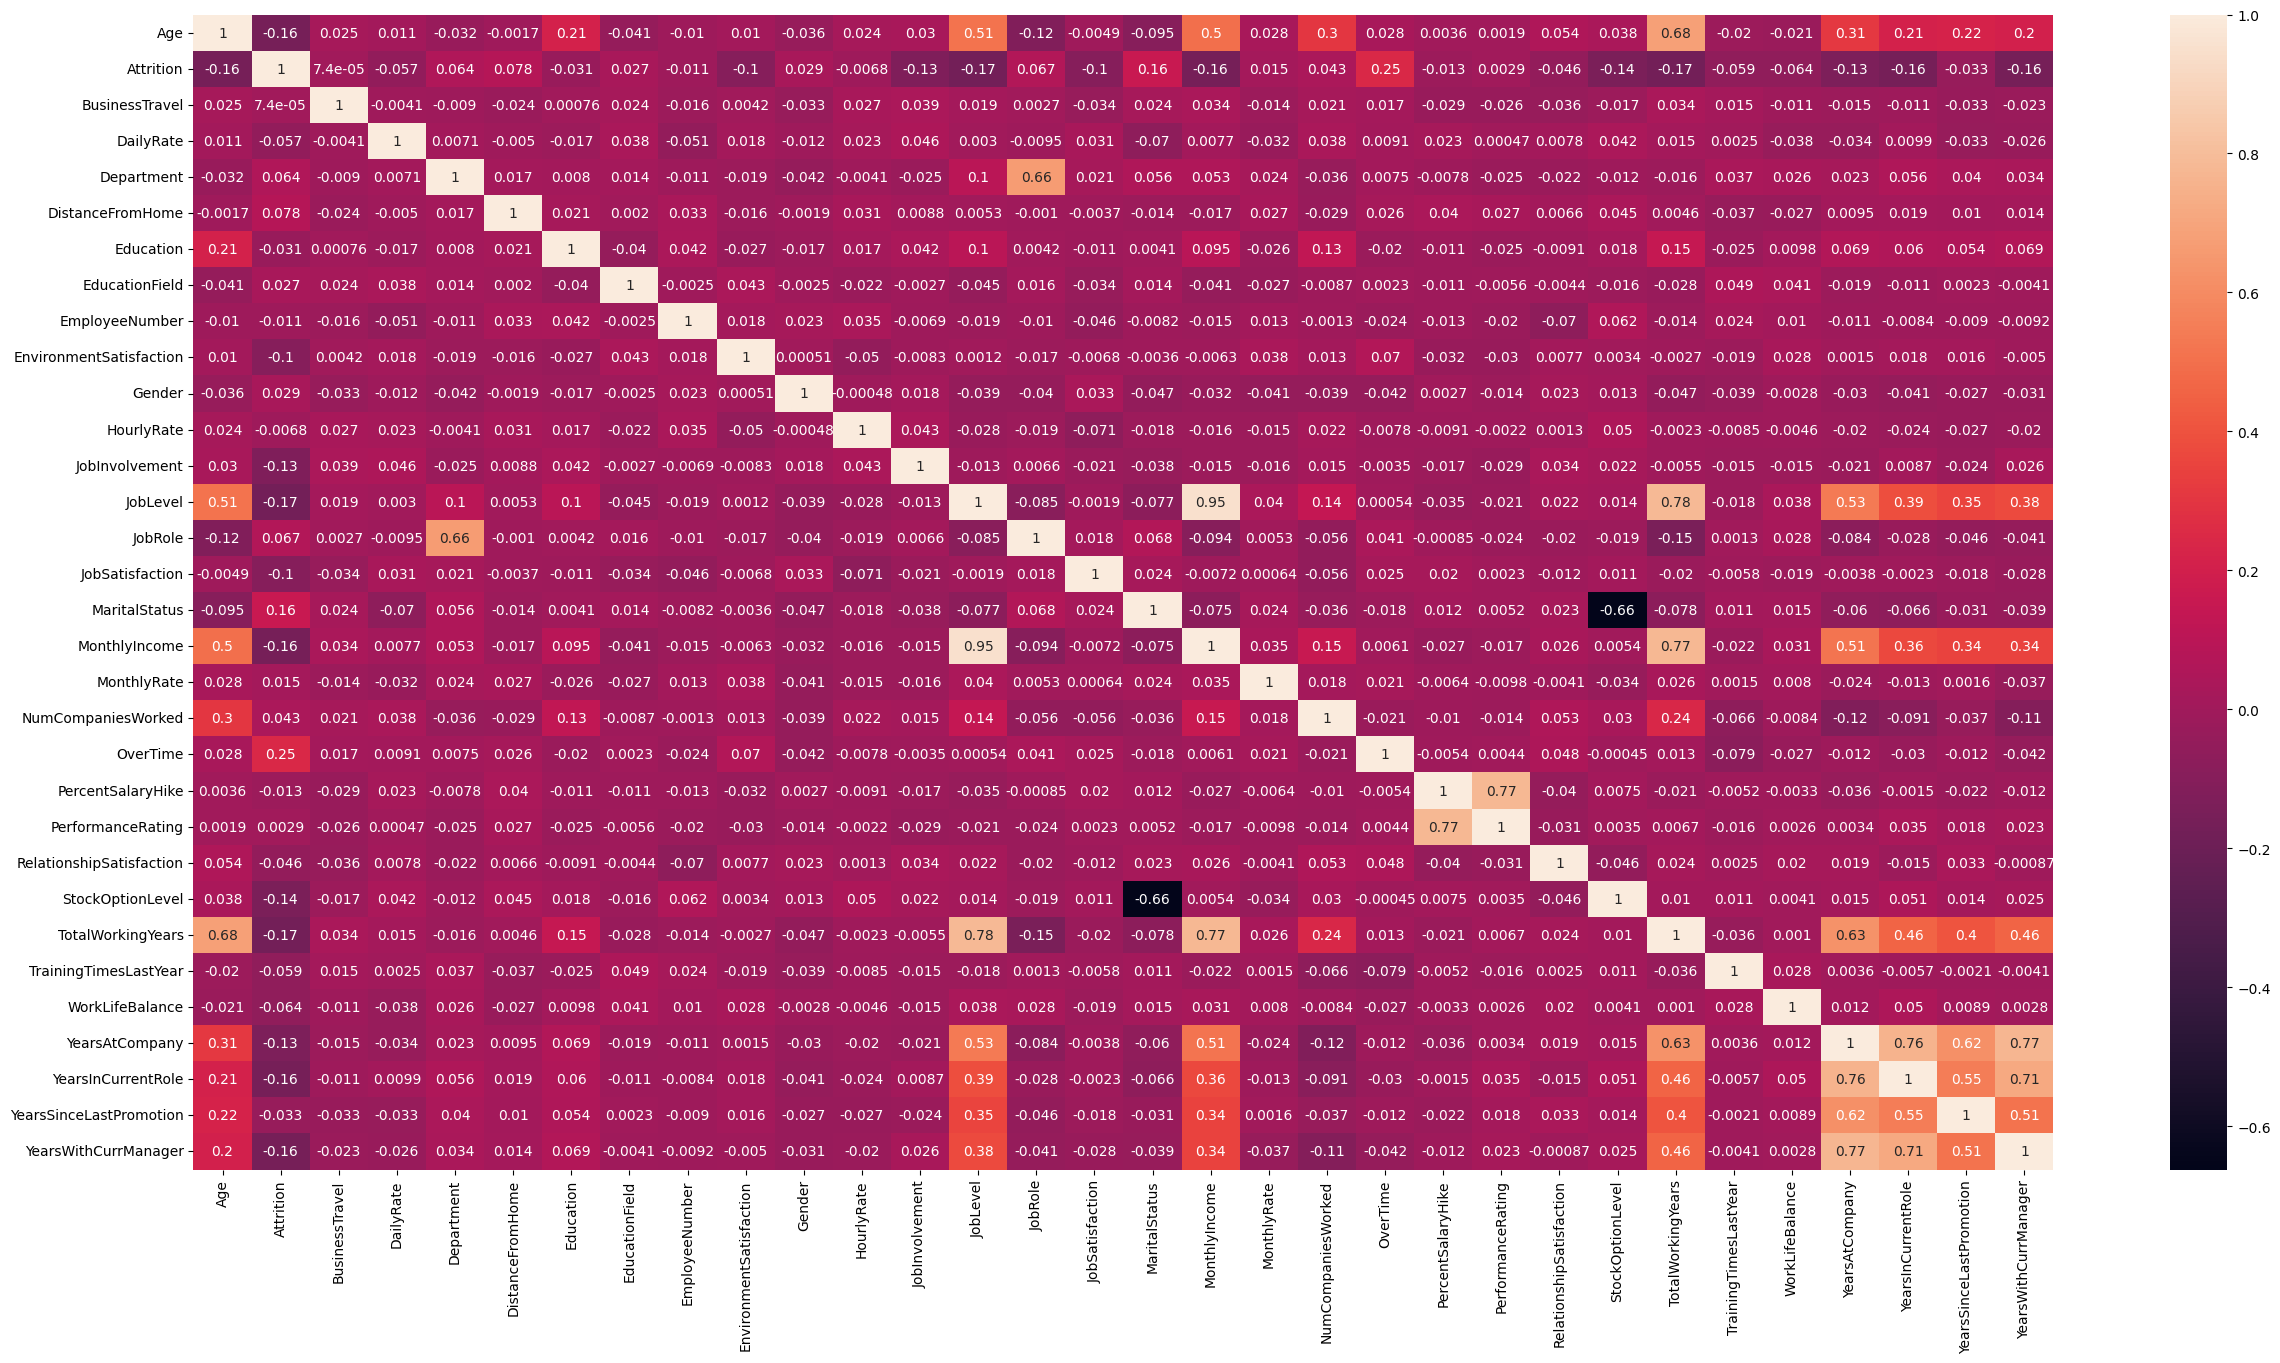

In [ ]:
#Check Correlation
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

1)joblevel and Monthlyincome high positive relation.   
2)totalworking years have high positive correaltaion with monthlyincome and joblevel.   
3)percentsalaryhike have high poistive correlation with performancerating.   
4)yearsatcompany have positive correlation with yearsincurrentrole and yearswithcurrentmanager.


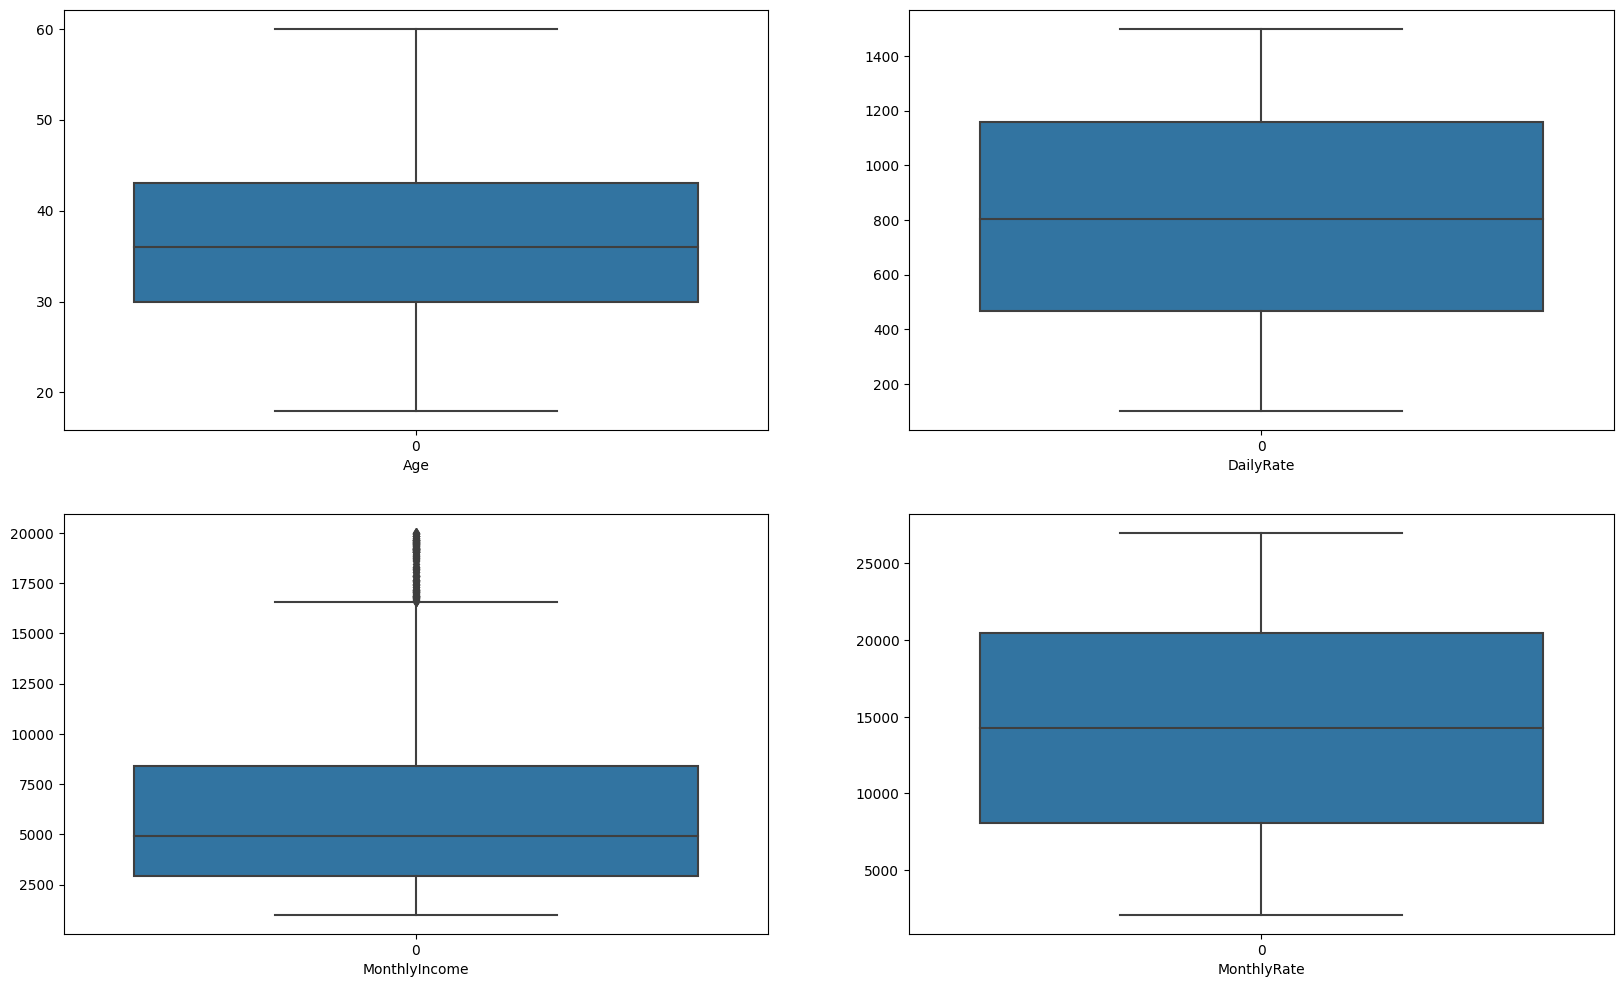

In [ ]:
#check outliers
continuos_f=['Age','DailyRate','MonthlyIncome','MonthlyRate']
plt.figure(figsize=(20,12))
plotno=1
for i in continuos_f:
  plt.subplot(2,2,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

In [ ]:
#check skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [8]:
#removing skewness
skewed_f=['DistanceFromHome','MonthlyIncome']
df['DistanceFromHome']=np.cbrt(df['DistanceFromHome'])
df['MonthlyIncome']=np.cbrt(df['MonthlyIncome'])

In [9]:
#split feature and label
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [ ]:
#check multicollinearity
vif=pd.DataFrame()
vif['feature']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,feature,score
0,Age,33.759062
1,BusinessTravel,6.828607
2,DailyRate,5.015938
3,Department,12.795420
4,DistanceFromHome,9.737381
5,Education,9.585547
6,EducationField,3.882453
7,EmployeeNumber,3.959929
8,EnvironmentSatisfaction,7.128232
9,Gender,2.520081


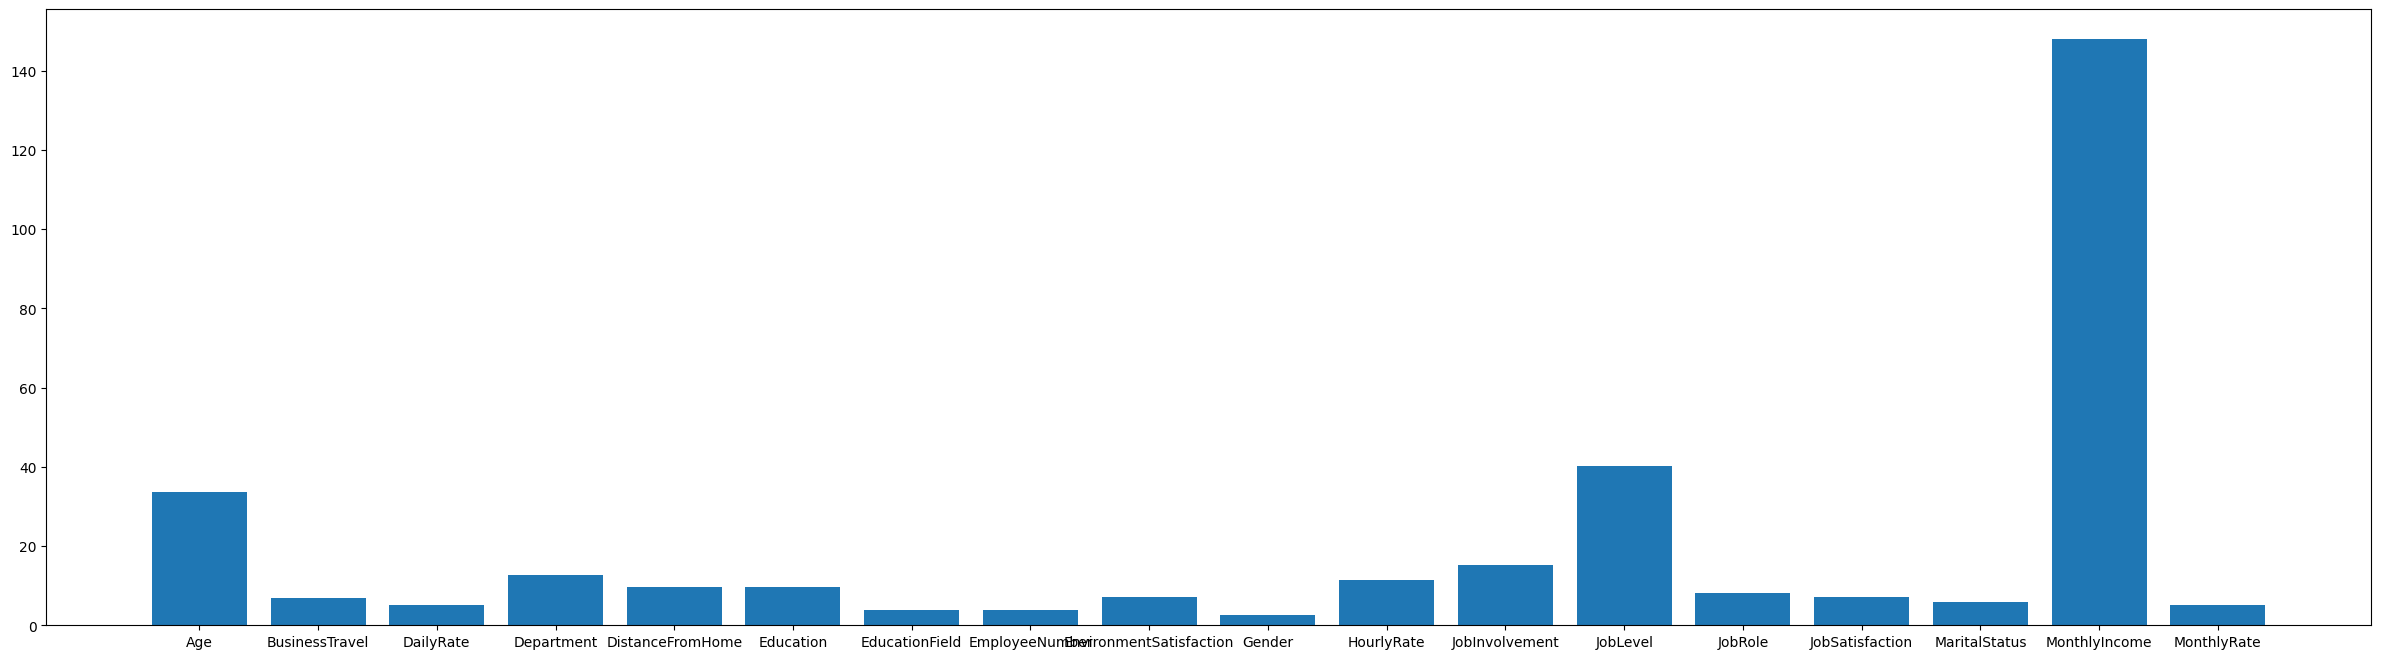

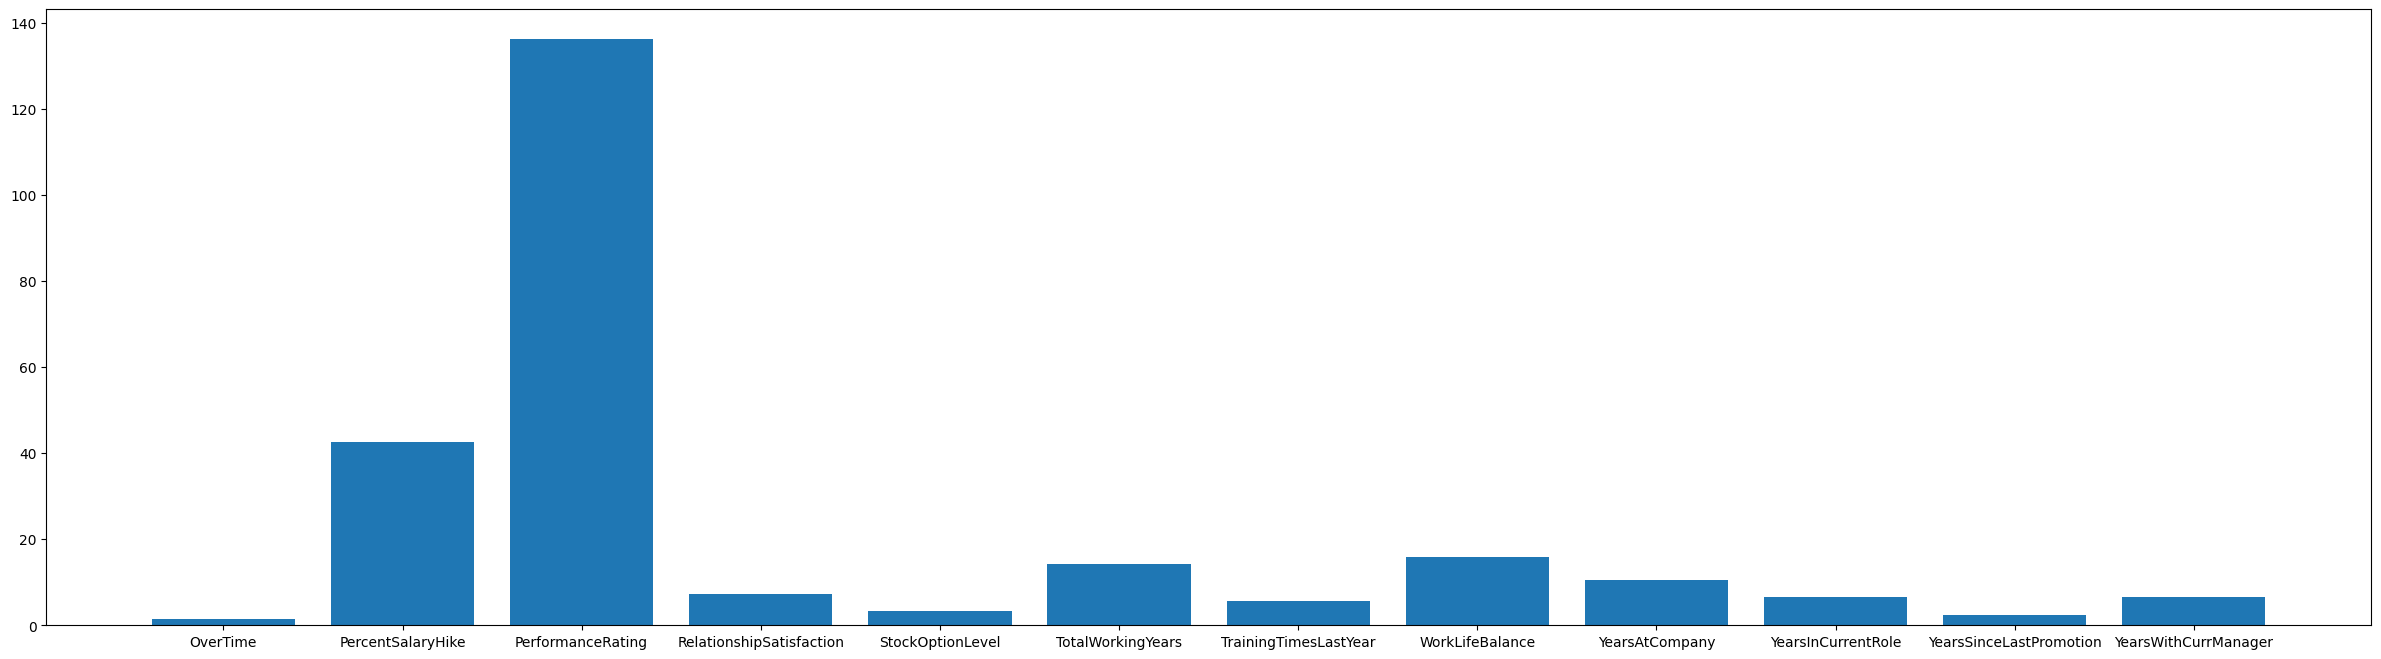

In [ ]:
#ploting vif score to analies highest and lowest feature score
vif1=vif.iloc[:18]
vif2=vif.iloc[19:]

plt.figure(figsize=(30,8))
plt.bar(vif1['feature'],vif1['score'])
plt.show()
plt.figure(figsize=(30,8))
plt.bar(vif2['feature'],vif2['score'])
plt.show()


Monthlyincome and performancerating has high f1 score so we were going to delete it to avoid multicolliniearity

In [10]:
df.drop(columns=['PerformanceRating','MonthlyIncome'],axis=1,inplace=True)

<Axes: xlabel='Attrition', ylabel='count'>

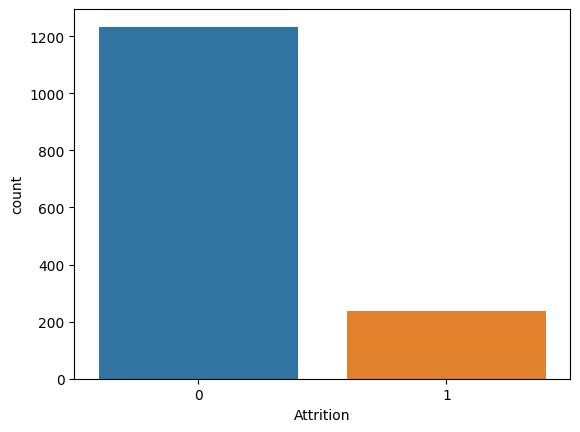

In [ ]:
sns.countplot(data=df,x=df['Attrition'])

In [11]:
#resampling to make class balanced
smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y)

<Axes: xlabel='Attrition', ylabel='count'>

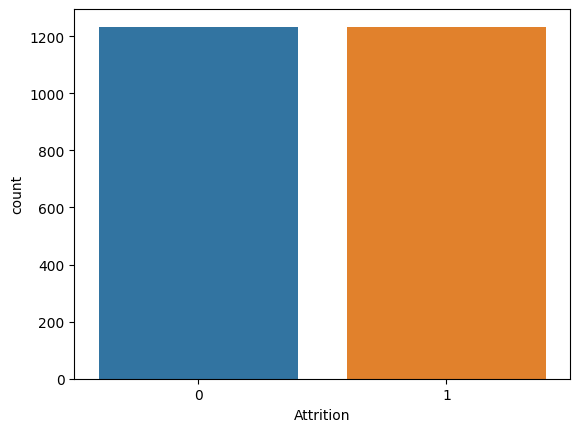

In [ ]:
sns.countplot(data=df,x=y_resampled)

In [12]:
#feature selection using selectkbest
select_best=SelectKBest(score_func=f_classif,k=30)
x_best=select_best.fit_transform(X_resampled,y_resampled)

In [13]:
#sampling data
scal=StandardScaler()
x_scal=scal.fit_transform(X_resampled)

In [14]:
#spliting data for training and testing
maxscr=0
ind=0
for i in range(200,250):
  x_train,x_test,y_train,y_test=train_test_split(x_scal,y_resampled,test_size=0.25,random_state=i)
  lr=LogisticRegression()
  lr.fit(x_scal,y_resampled)
  yr_pred=lr.predict(x_test)
  scr=accuracy_score(y_test,yr_pred)
  if scr > maxscr:
    maxscr=scr
    ind=i

print(f'max score {maxscr} ata index {ind}')

max score 0.8833063209076175 ata index 223


In [15]:
#split data for training and testing at best randomstate
x_train,x_test,y_train,y_test=train_test_split(x_scal,y_resampled,test_size=0.25,random_state=ind)

**Model Building**

In [16]:
#defining function for model buliding and evaluating model
def train(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*15,'Training Score','-'*15)
  ytr_pred=alg.predict(x_train)
  scr=accuracy_score(y_train,ytr_pred)
  print(scr)
  print('-'*15,'Testing score','-'*15)
  y_pred=alg.predict(x_test)
  testing_score=accuracy_score(y_test,y_pred)
  print(testing_score)
  print('-'*15,'Confusion Matrix','-'*15)
  print(confusion_matrix(y_test,y_pred))
  return alg,testing_score

In [17]:
#building logisticclassifier
lc,lc_test_score=train(LogisticRegression(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8399134667387778
--------------- Testing score ---------------
0.8784440842787682
--------------- Confusion Matrix ---------------
[[243  36]
 [ 39 299]]


In [18]:
#building kneighborsclassifier
knn,knn_test_score=train(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8939967550027041
--------------- Testing score ---------------
0.8784440842787682
--------------- Confusion Matrix ---------------
[[211  68]
 [  7 331]]


In [19]:
#building svc
svc,svc_test_score=train(SVC(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9561925365062196
--------------- Testing score ---------------
0.9238249594813615
--------------- Confusion Matrix ---------------
[[260  19]
 [ 28 310]]


In [20]:
#building Decisiontreeclassifier
dt,dt_test_score=train(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing score ---------------
0.8314424635332253
--------------- Confusion Matrix ---------------
[[225  54]
 [ 50 288]]


In [21]:
#building Randomforestclassifier
rf,rf_test_score=train(RandomForestClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing score ---------------
0.9303079416531604
--------------- Confusion Matrix ---------------
[[263  16]
 [ 27 311]]


In [22]:
#building AdaBoostClassifier
adc,adc_test_score=train(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8783126014061655
--------------- Testing score ---------------
0.8865478119935171
--------------- Confusion Matrix ---------------
[[250  29]
 [ 41 297]]


In [23]:
#building GradientBoostingClassifier
gbc,gbc_test_score=train(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9464575446187128
--------------- Testing score ---------------
0.9303079416531604
--------------- Confusion Matrix ---------------
[[262  17]
 [ 26 312]]


In [24]:
#building xgboostingclassifier
xgb,xgb_test_score=train(XGBClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing score ---------------
0.9351701782820098
--------------- Confusion Matrix ---------------
[[264  15]
 [ 25 313]]


**Cross Validation**

In [25]:
#defining function for cross validation
def crossValidation(alg,x_train,y_train,cv,alg_test_score):
  cv=cross_val_score(alg,x_train,y_train,cv=cv)
  print('cv_scores',cv,'\n'*2,'cv mean:       algorithum score:       differene:')
  print(f'  {round(cv.mean()*100,2)}             {round(alg_test_score*100,2)}                 {round(np.abs((cv.mean()-alg_test_score)*100),2)}')
  #print(f'differene between cv score and testing score {np.abs((cv.mean()-alg_test_score)*100)}')

In [42]:
#cross validating logisticregression
crossValidation(LogisticRegression(),x_train,y_train,30,lc_test_score)

cv_scores [0.90322581 0.87096774 0.75806452 0.85483871 0.83870968 0.83870968
 0.87096774 0.82258065 0.85483871 0.87096774 0.83870968 0.87096774
 0.87096774 0.85483871 0.75806452 0.85483871 0.77419355 0.77419355
 0.83870968 0.83606557 0.81967213 0.85245902 0.81967213 0.80327869
 0.81967213 0.78688525 0.81967213 0.81967213 0.80327869 0.78688525] 

 cv mean:       algorithum score:       differene:
  82.96             87.84                 4.89


In [41]:
#cross validating kneighborsclassifier
crossValidation(KNeighborsClassifier(),x_train,y_train,30,knn_test_score)

cv_scores [0.85483871 0.90322581 0.75806452 0.88709677 0.90322581 0.79032258
 0.83870968 0.85483871 0.82258065 0.79032258 0.85483871 0.87096774
 0.88709677 0.82258065 0.80645161 0.85483871 0.82258065 0.79032258
 0.82258065 0.85245902 0.83606557 0.85245902 0.73770492 0.83606557
 0.80327869 0.81967213 0.78688525 0.83606557 0.85245902 0.85245902] 

 cv mean:       algorithum score:       differene:
  83.34             87.84                 4.51


In [40]:
#cross validating svc
crossValidation(SVC(),x_train,y_train,30,svc_test_score)

cv_scores [0.91935484 0.91935484 0.77419355 0.93548387 0.88709677 0.88709677
 0.96774194 0.83870968 0.90322581 0.87096774 0.87096774 0.90322581
 0.93548387 0.90322581 0.82258065 0.91935484 0.85483871 0.88709677
 0.93548387 0.90163934 0.95081967 0.90163934 0.91803279 0.8852459
 0.90163934 0.91803279 0.90163934 0.90163934 0.80327869 0.86885246] 

 cv mean:       algorithum score:       differene:
  89.29             92.38                 3.09


In [39]:
#cross validating decisiontreeclassifier
crossValidation(DecisionTreeClassifier(),x_train,y_train,30,dt_test_score)

cv_scores [0.80645161 0.77419355 0.75806452 0.72580645 0.83870968 0.79032258
 0.85483871 0.74193548 0.90322581 0.83870968 0.70967742 0.66129032
 0.74193548 0.82258065 0.75806452 0.79032258 0.74193548 0.85483871
 0.82258065 0.81967213 0.85245902 0.85245902 0.75409836 0.85245902
 0.70491803 0.7704918  0.75409836 0.67213115 0.72131148 0.81967213] 

 cv mean:       algorithum score:       differene:
  78.36             83.14                 4.78


In [35]:
#cross validating RandomForestClassifier
crossValidation(RandomForestClassifier(),x_train,y_train,30,rf_test_score)

cv_scores [0.9516129  0.90322581 0.87096774 0.88709677 0.88709677 0.85483871
 0.9516129  0.85483871 0.9516129  0.91935484 0.87096774 0.88709677
 0.93548387 0.93548387 0.90322581 0.93548387 0.88709677 0.9516129
 0.93548387 0.86885246 0.90163934 0.91803279 0.86885246 0.8852459
 0.90163934 0.91803279 0.93442623 0.86885246 0.85245902 0.8852459 ] 

 cv mean:       algorithum score:       differene:
  90.26             93.03                 2.77


In [36]:
#cross validating AdaBoostClassifier
crossValidation(AdaBoostClassifier(),x_train,y_train,30,adc_test_score)

cv_scores [0.88709677 0.88709677 0.79032258 0.87096774 0.83870968 0.80645161
 0.85483871 0.77419355 0.87096774 0.85483871 0.80645161 0.82258065
 0.85483871 0.83870968 0.79032258 0.85483871 0.83870968 0.83870968
 0.96774194 0.85245902 0.83606557 0.86885246 0.85245902 0.80327869
 0.90163934 0.86885246 0.83606557 0.80327869 0.90163934 0.91803279] 

 cv mean:       algorithum score:       differene:
  84.97             88.65                 3.68


In [37]:
#cross validating GradientBoostingClasifier
crossValidation(GradientBoostingClassifier(),x_train,y_train,30,gbc_test_score)

cv_scores [0.9516129  0.88709677 0.80645161 0.88709677 0.82258065 0.88709677
 0.91935484 0.88709677 0.91935484 0.90322581 0.80645161 0.85483871
 0.96774194 0.87096774 0.83870968 0.85483871 0.85483871 0.88709677
 0.9516129  0.8852459  0.8852459  0.8852459  0.86885246 0.83606557
 0.85245902 0.91803279 0.8852459  0.85245902 0.86885246 0.8852459 ] 

 cv mean:       algorithum score:       differene:
  87.94             93.03                 5.09


In [38]:
#cross validating XGBoosClassifier
crossValidation(XGBClassifier(),x_scal,y_resampled,30,xgb_test_score)

cv_scores [0.73493976 0.72289157 0.74698795 0.75903614 0.77108434 0.77108434
 0.95121951 0.97560976 0.97560976 0.96341463 0.95121951 0.92682927
 0.93902439 0.90243902 0.93902439 0.97560976 0.93902439 0.91463415
 0.90243902 0.98780488 0.93902439 0.96341463 0.96341463 0.91463415
 0.98780488 0.97560976 0.92682927 0.95121951 0.96341463 0.97560976] 

 cv mean:       algorithum score:       differene:
  91.04             93.52                 2.48


According to score difference I selected randomforestclassifier

**Tunning**

In [ ]:
param_grid={'n_estimators':[100,200,300],
            'criterion':['gini','entropy'],
          }
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [ ]:
param_grid={'n_estimators':[100],
            'criterion':['entropy'],
              'min_samples_split':[2,4],
             'min_samples_leaf':[1,2]}
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [100]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
param_grid={'n_estimators':[200],
            'criterion':['gini'],
              'min_samples_split':[2],
             'min_samples_leaf':[1],
              'bootstrap':[True,False],
            'max_features':['auto','sqrt','log2','none']}
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt', 'log2', 'none'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [200]})

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:

tunned_rf=RandomForestClassifier(n_estimators=200,max_features='log2',bootstrap=False)
tunned_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=200)

In [ ]:
accuracy_score(y_test,tunned_rf.predict(x_test))

0.9205834683954619

In [ ]:
#model sving
import pickle as pkl
pkl.dump(tunned_rf,open('hranalysis_rf.sav','wb'))

In [ ]:
#load model
hranalysis_rf=pkl.load(open('hranalysis_rf.sav','rb'))

In [ ]:
cmp_df=pd.DataFrame()
cmp_df['y_test']=y_test
cmp_df['y_pred']=hranalysis_rf.predict(x_test)
cmp_df

,y_test,y_pred
2087,1,1
911,1,1
875,0,0
1054,0,0
1372,0,0
...,...,...
125,0,1
2181,1,1
1001,0,0
1522,1,1
